In [95]:
% matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_file = pd.read_csv(city_data_to_load)
ride_data_file = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
master_sheet_pyber = pd.merge(city_data_file, ride_data_file, how='outer', on='city')
master_sheet_pyber.sort_values('fare', ascending="False")

# Display the data table for preview
master_sheet_pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [96]:
# Create a better sheet to condense data used to visualize requested data 
plot_data = plot_data.sort_values(['type', 'Driver Count'], ascending=False)
# rows are truncated, so write to a new .csv to read in excel. Use to_csv
#plot_data.to_csv(r"../Driver Data Per City.csv")
plot_data

,,Total Rides,Average Fare,Driver Count
city,type,,,
West Samuelburgh,Urban,25,21.767600,73
South Michelleport,Urban,31,24.451613,72
West Anthony,Urban,30,24.736667,70
Liumouth,Urban,33,26.150000,69
Port Angela,Urban,19,23.836842,67
Reynoldsfurt,Urban,19,21.919474,67
East Kaylahaven,Urban,29,23.757931,65
Jerryton,Urban,25,25.649200,64
Royland,Urban,30,20.570667,64


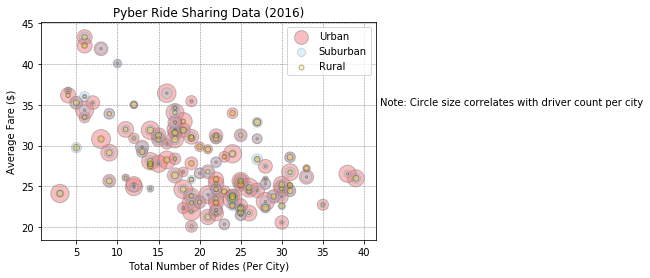

In [111]:

# Split into categories for each color in the scatter plot 

total_rides_per_city = plot_data['Total Rides']
avg_fare_per_city = plot_data ['Average Fare']

#number of Drivers per type, city 
city_df_urban = city_data_file.loc[city_data_file["type"]=="Urban"]
city_df_suburban = city_data_file.loc[city_data_file["type"]=="Suburban"]
city_df_rural = city_data_file.loc[city_data_file["type"]=="Rural"]

#Sum of drivers per city

# Driver count for Urban
city_df_urban_groupbycity = city_df_urban.groupby("city")
city_df_urban_drivercount = city_df_urban_groupbycity["driver_count"].sum()
# Driver count for Suburban
city_df_suburban_groupbycity = city_df_suburban.groupby("city")
city_df_suburban_drivercount = city_df_suburban_groupbycity["driver_count"].sum()
# Driver count for Rural
city_df_rural_groupbycity = city_df_rural.groupby("city")
city_df_rural_drivercount = city_df_rural_groupbycity["driver_count"].sum()


plot_elements = pd.DataFrame({
    "Total Rides": total_rides_per_city,
    "Average Fare": avg_fare_per_city,
    "Driver Count Urban": city_df_urban_drivercount,
    "Driver Count Rural": city_df_rural_drivercount, 
    "Driver Count Suburban": city_df_suburban_drivercount
})


x_axis = np.arange(0, max(plot_elements['Total Rides']))
y_axis = np.arange (0, max(plot_elements['Average Fare']))
plt.xlim = (0, x_axis)
plt.ylim = (0, y_axis)

# Build the scatter plots for each city types

urban_plot =    plt.scatter(total_rides_per_city,avg_fare_per_city,s=city_df_urban_drivercount*5,
                            alpha=.5, marker='o',facecolors=["Lightcoral"],
                            edgecolors=["gray"],label="Urban")
suburban_plot = plt.scatter(total_rides_per_city,avg_fare_per_city,s= city_df_suburban_drivercount*5,
                            alpha=.3,marker='o',facecolors=["Lightskyblue"],
                            edgecolors=["gray"],label="Suburban")
rural_plot =    plt.scatter(total_rides_per_city,avg_fare_per_city,s=city_df_rural_drivercount*5,
                            alpha=.3, marker='o',facecolors=["Gold"], 
                            edgecolors=["black"], label="Rural")

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 35, s="Note: Circle size correlates with driver count per city")
plt.grid(axis='both', linewidth=.5, color = 'gray', linestyle='--')

# Create a legend 

plt.legend()

# Save Figure
plt.savefig('Pyber Ride Sharing Data (2016).png')
plt.show()

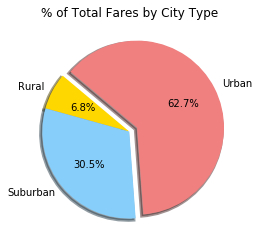

In [112]:
# Calculate Type Percents

city_type_percents = master_sheet_pyber.groupby('type')['fare'].sum()
city_type_df = pd.DataFrame(city_type_percents)
city_type_df


# Build Pie Chart

plt.title("% of Total Fares by City Type")
labels = ['Rural','Suburban','Urban']
sizes = city_type_df
colors = ["gold","lightskyblue","lightcoral"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=["gold","lightskyblue","lightcoral"], explode = explode, wedgeprops = {'linewidth': 3},
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure

plt.savefig("% Total Fares Per City Type.png")
plt.show()

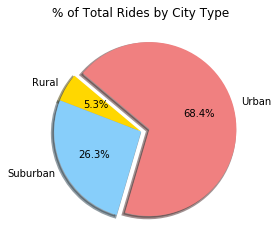

In [113]:
# Calculate Ride Percents

ride_by_city_type = master_sheet_pyber.groupby('type')['ride_id'].count()
ride_by_city_type_df = pd.DataFrame(ride_by_city_type)
ride_by_city_type_df

# Build Pie Chart
plt.title("% of Total Rides by City Type")
labels = ['Rural','Suburban','Urban']
sizes = ride_by_city_type_df
colors = ["gold","lightskyblue","lightcoral"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=["gold","lightskyblue","lightcoral"], explode = explode, wedgeprops = {'linewidth': 3},
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("% of Total Rides by City Type.png")
plt.show()

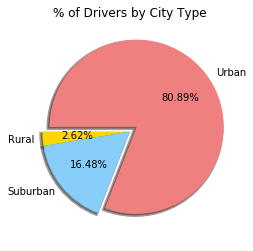

In [152]:
# Calculate Driver Percents

driver_percent_by_city = city_data_file.groupby ('type')['driver_count'].sum()

# Build Pie Charts

plt.title("% of Drivers by City Type")
labels = ['Rural','Suburban','Urban']
sizes = driver_percent_by_city_df
colors = ["gold","lightskyblue","lightcoral"]
explode = [0.0, 0.0, 0.1]

plt.pie(driver_percent_by_city, labels=labels, colors=["gold","lightskyblue","lightcoral"], explode=explode, 
        wedgeprops = {'linewidth': 3}, 
        autopct="%1.2f%%", shadow=True, 
        startangle=180, 
        radius= (1), 
        center=(0, 2)
    )
        
# Save Figure
plt.savefig("% of Drivers by City Type.png")
plt.show()